In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
# read the image
src_img = plt.imread("2.Fig2.19(a).jpg")

In [3]:
# image matrix
src_img

array([[21, 16, 15, ..., 23, 23, 23],
       [21, 19, 17, ..., 23, 23, 24],
       [17, 17, 20, ..., 24, 23, 23],
       ...,
       [ 7,  7,  7, ..., 21, 21, 21],
       [10, 10,  9, ..., 17, 17, 17],
       [11, 10, 10, ..., 15, 15, 15]], dtype=uint8)

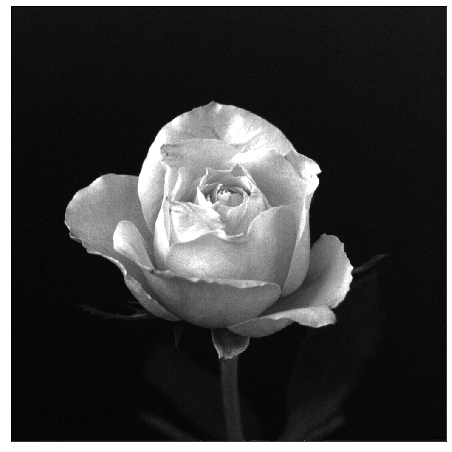

In [4]:
plt.figure(figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.imshow(src_img, cmap=plt.cm.gray)

In [5]:
def im_resize(img, width, height):
    src_width = img.shape[0]
    src_height = img.shape[1]
    ratio_w = src_width / width
    ratio_h = src_height / height
    new_img = np.zeros(shape=(width, height))
    # when zoom the image, pad the image with the edge values of array
    # padding width = 1
    if ratio_w < 1:
        img = np.pad(img, ((0, 1), (0, 0)), 'edge')
    if ratio_h < 1:
        img = np.pad(img, ((0, 0), (0, 1)), 'edge')
    for i in range(width):
        for j in range(height):
            # coordinate mapping
            obj_coor_x = (i + 0.5) * ratio_w - 0.5
            obj_coor_y = (j + 0.5) * ratio_h - 0.5
            x1 = math.floor(obj_coor_x)
            x2 = math.ceil(obj_coor_x)
            y1 = math.floor(obj_coor_y)
            y2 = math.ceil(obj_coor_y)
            m1 = np.array([x2 - obj_coor_x, obj_coor_x - x1])
            m2 = np.array([[img[x1, y1], img[x1, y2]], [img[x2, y1], img[x2, y2]]])
            m3 = np.array([y2 - obj_coor_y, obj_coor_y - y1])
            new_img[i, j] = round((1 / ((x2 - x1) * (y2 - y1))) * m1.dot(m2.dot(m3)))
            
    return new_img
            

In [6]:
img_shrinked = im_resize(src_img, 256, 256)
img_zoomed = im_resize(img_shrinked, 1024, 1024)

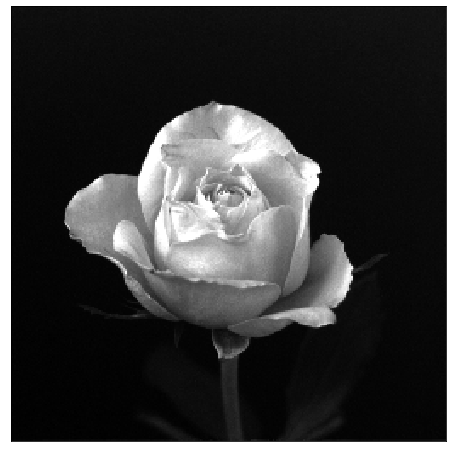

In [7]:
plt.figure(figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.imshow(img_shrinked, cmap=plt.cm.gray)
plt.imsave('2.19(a)_shrinked.jpg', img_shrinked, cmap=plt.cm.gray)

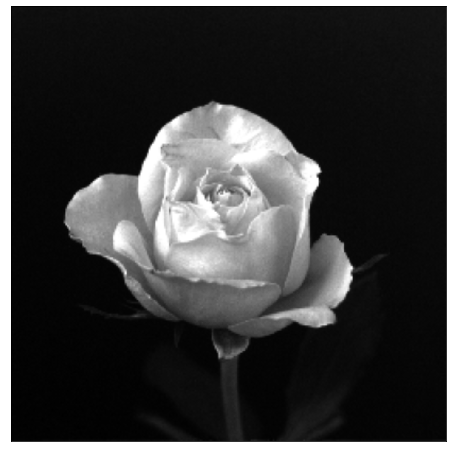

In [8]:
plt.figure(figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.imshow(img_zoomed, cmap=plt.cm.gray)
plt.imsave('2.19(a)_zoomed.jpg', img_zoomed, cmap=plt.cm.gray)